# Project Title: Student Performance Prediction Using Decision Tree Classifier

Author: Md. Maruf
Date: 26-12-2025

Project Overview:
This project aims to predict the performance of students based on various features such as 
Student_ID,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,and other relevant attributes. The main goal is to classify students into different performance categories using a Decision Tree Classifier.

Dataset:
- Source: Dataset downloaded from kaggle.
- Features: Student_ID,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,       Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail.
- Target: Student performance category (Pass or Fail)

Objectives:
1. Load and explore the student performance dataset.
2. Preprocess the data (handle missing values, encode categorical variables, normalize if needed).
3. Train a Decision Tree Classifier model.
4. Evaluate the model's performance using metrics like accuracy, recall, and F1-score, Classification report, Confussion Metrics, ruc auc score.
5. Visualize the decision tree for better understanding and interpretation.

Tools & Libraries:
- Python 3.x
- pandas, numpy
- scikit-learn
- matplotlib, seaborn (for visualization)

Expected Outcome:
- A trained Decision Tree model capable of predicting student performance.
- Insights into which features most influence student performance.
- Visual representation of the decision-making process of the tree.

Notes:
- Ensure to split the dataset into training and testing sets to avoid overfitting.
- Hyperparameter tuning may be applied to improve model accuracy.


In [85]:
# Importing Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, auc, roc_curve

In [86]:
# Load the student performance dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('Student_Performance_Dataset.csv')


In [87]:
## Display the first five rows of the DataFrame to quickly inspect the dataset structure and values
df.head()

,Student_ID,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
0,S0001,15,Male,12,1.0,65,Postgraduate,No,No,40,39,72,81,50.33,Average,Pass
1,S0002,19,Female,9,1.6,58,Graduate,No,Yes,80,44,35,47,53.00,Average,Pass
2,S0003,14,Female,12,3.6,64,High School,Yes,Yes,83,73,59,58,71.67,Good,Pass
3,S0004,18,Female,9,5.5,68,Postgraduate,Yes,No,68,48,77,54,64.33,Average,Pass
4,S0005,14,Male,10,5.0,80,High School,Yes,No,41,46,36,68,41.00,Poor,Fail


In [88]:
# Display a concise summary of the DataFrame including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Gender                      5000 non-null   object 
 3   Class                       5000 non-null   int64  
 4   Study_Hours_Per_Day         5000 non-null   float64
 5   Attendance_Percentage       5000 non-null   int64  
 6   Parental_Education          5000 non-null   object 
 7   Internet_Access             5000 non-null   object 
 8   Extracurricular_Activities  5000 non-null   object 
 9   Math_Score                  5000 non-null   int64  
 10  Science_Score               5000 non-null   int64  
 11  English_Score               5000 non-null   int64  
 12  Previous_Year_Score         5000 non-null   int64  
 13  Final_Percentage            5000 

In [89]:
# Return the number of rows and columns in the DataFrame
df.shape

(5000, 16)

In [90]:
# Check for missing values in each column and return the total count of null values per column
df.isnull().sum()

Student_ID                    0
Age                           0
Gender                        0
Class                         0
Study_Hours_Per_Day           0
Attendance_Percentage         0
Parental_Education            0
Internet_Access               0
Extracurricular_Activities    0
Math_Score                    0
Science_Score                 0
English_Score                 0
Previous_Year_Score           0
Final_Percentage              0
Performance_Level             0
Pass_Fail                     0
dtype: int64

In [91]:
df = df.astype({
    'Gender' : 'category', 
    'Parental_Education' : 'category',
    'Internet_Access' : 'category',
    'Extracurricular_Activities' : 'category', 
    'Performance_Level' : 'category',
    'Pass_Fail' : 'category'
})

In [92]:
# Create an empty dictionary to store the number of outliers for each numerical column
outlier_counts = {}

# Loop through all numerical columns in the DataFrame
for col in df.select_dtypes(include='number').columns:
    
    # Calculate the first quartile (25th percentile) of the column
    q1 = df[col].quantile(.25)
    
    # Calculate the third quartile (75th percentile) of the column
    q3 = df[col].quantile(.75)

    # Compute the Interquartile Range (IQR) to measure data spread
    iqr = q3 - q1

    # Define the lower bound for outliers using the IQR method
    lower_whisker = q1 - 1.5 * iqr
    
    # Define the upper bound for outliers using the IQR method
    upper_whisker = q3 + 1.5 * iqr

    # Identify values that are below the lower bound or above the upper bound
    count = (df[col] < lower_whisker) | (df[col] > upper_whisker)
    
    # Store the total number of outliers for the current column
    outlier_counts[col] = count.sum()

# Create a DataFrame from the outlier count dictionary for better visualization
outlier_df = pd.DataFrame(
    {
        'Columns': outlier_counts.keys(),          # Store column names
        'Outlier_counts': outlier_counts.values()  # Store corresponding outlier counts
    }
)

# Display the DataFrame showing outlier counts for each numerical column
outlier_df


,Columns,Outlier_counts
0,Age,0
1,Class,0
2,Study_Hours_Per_Day,0
3,Attendance_Percentage,0
4,Math_Score,0
5,Science_Score,0
6,English_Score,0
7,Previous_Year_Score,0
8,Final_Percentage,0


Visualization

In [93]:
# Return the list of all column names in the DataFrame
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Class', 'Study_Hours_Per_Day',
       'Attendance_Percentage', 'Parental_Education', 'Internet_Access',
       'Extracurricular_Activities', 'Math_Score', 'Science_Score',
       'English_Score', 'Previous_Year_Score', 'Final_Percentage',
       'Performance_Level', 'Pass_Fail'],
      dtype='object')

Age


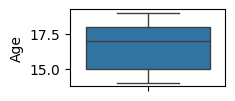

Class


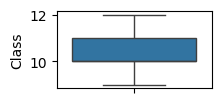

Study_Hours_Per_Day


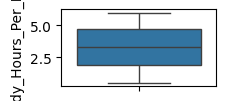

Attendance_Percentage


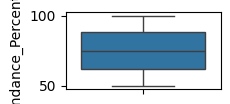

Math_Score


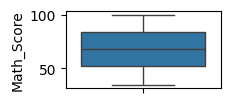

Science_Score


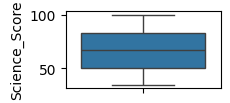

English_Score


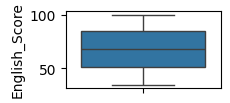

Previous_Year_Score


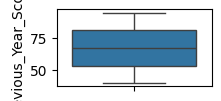

Final_Percentage


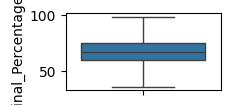

In [94]:
# Loop through all numerical columns in the DataFrame
for col1 in df.select_dtypes(include='number'):
    
    # Print the name of the current numerical column
    print(col1)
    
    # Create a new figure for the boxplot with specified size
    plt.figure(figsize=(2,1))
    
    # Plot a boxplot for the current numerical column to visualize distribution and outliers
    sns.boxplot(df[col1])
    
    # Display the boxplot
    plt.show()


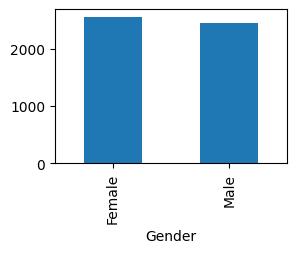

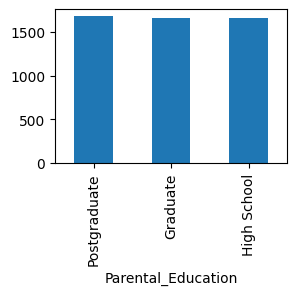

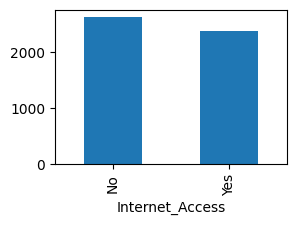

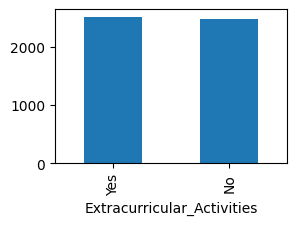

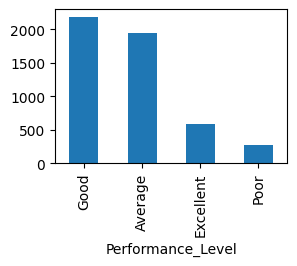

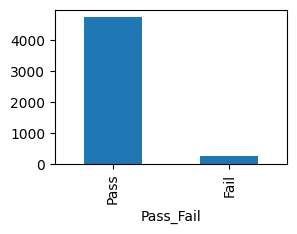

In [95]:
# Loop through all categorical columns in the DataFrame
for col2 in df.select_dtypes(include='category').columns:
    
    # Create a new figure for the bar plot with specified size
    plt.figure(figsize=(3,2))
    
    # Plot the frequency of each category in the column as a bar chart
    df[col2].value_counts().plot(kind='bar')
    
    # Display the bar chart
    plt.show()


Encoding


In [96]:
# Create an instance of LabelEncoder to convert categorical labels into numeric form
le = LabelEncoder()

In [97]:
# Loop through all columns in the DataFrame
for col3 in df.columns:
    
    # Check if the column is not numeric
    if not is_numeric_dtype(df[col3]):
        
        # Encode categorical values into numeric labels using LabelEncoder
        df[col3] = le.fit_transform(df[col3])

# Display the first five rows of the updated DataFrame after encoding
df.head()

,Student_ID,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
0,0,15,1,12,1.0,65,2,0,0,40,39,72,81,50.33,0,1
1,1,19,0,9,1.6,58,0,0,1,80,44,35,47,53.00,0,1
2,2,14,0,12,3.6,64,1,1,1,83,73,59,58,71.67,2,1
3,3,18,0,9,5.5,68,2,1,0,68,48,77,54,64.33,0,1
4,4,14,1,10,5.0,80,1,1,0,41,46,36,68,41.00,3,0


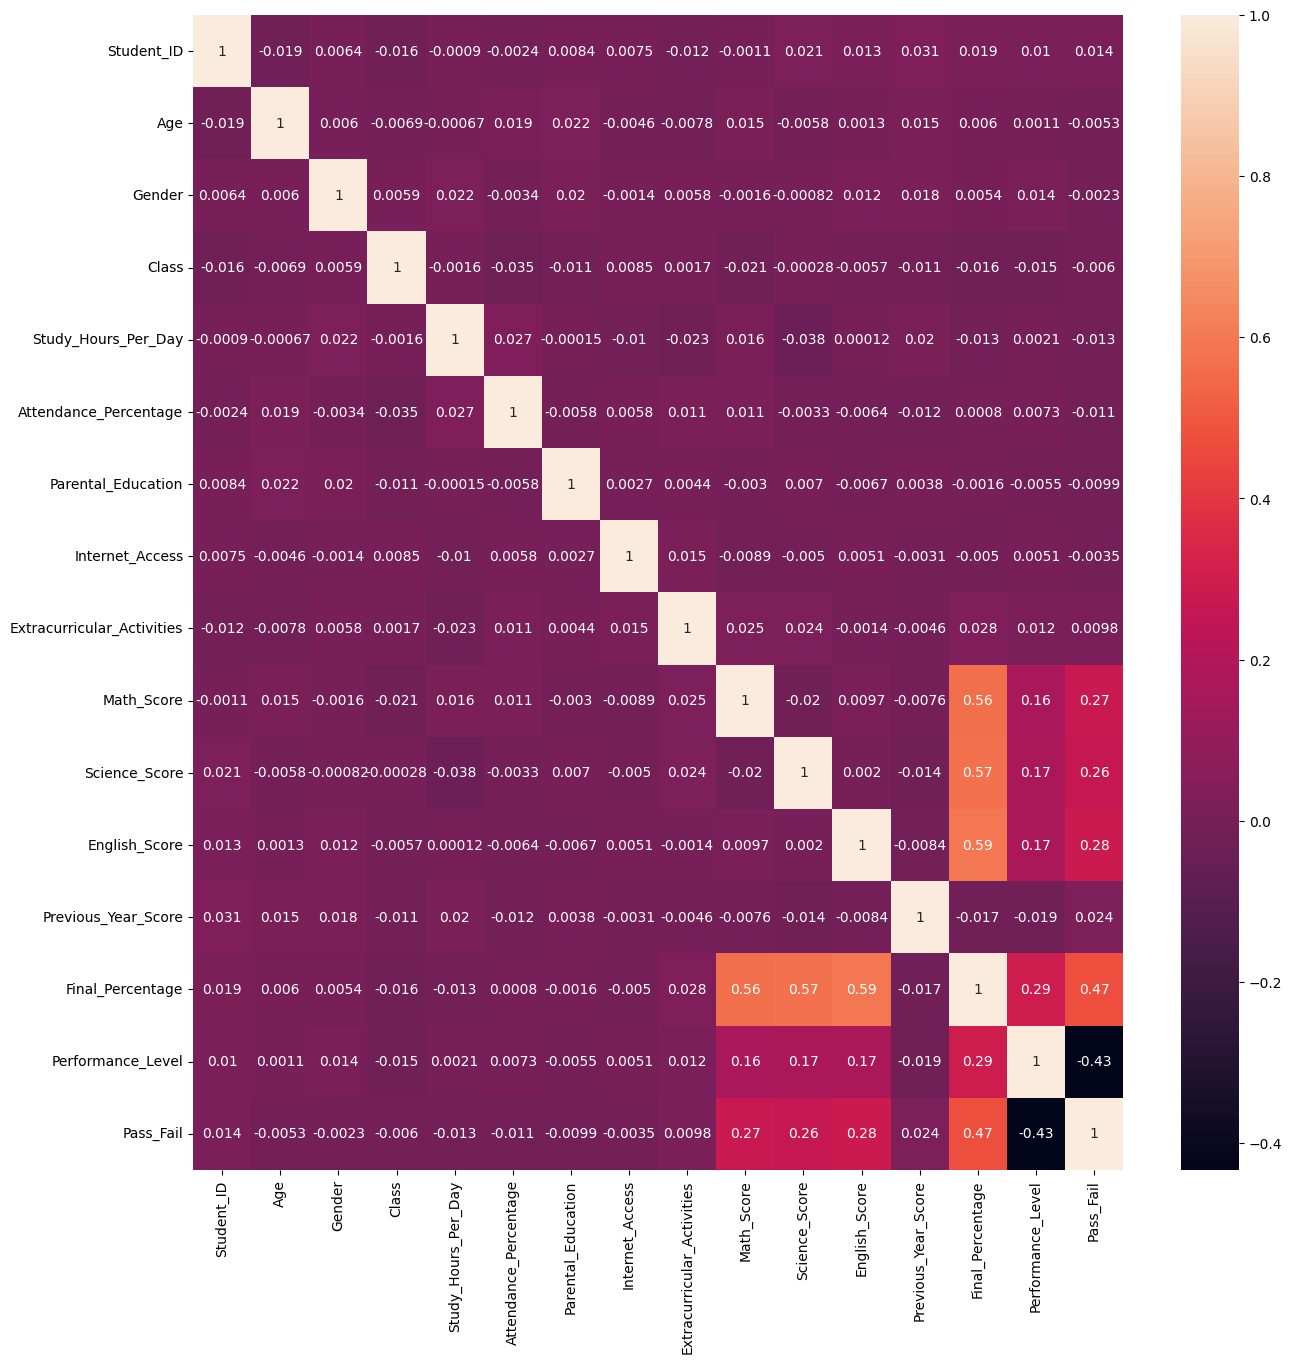

In [98]:
# Create a large figure to visualize the correlation matrix of all numerical features
plt.figure(figsize=(15,15))

# Plot a heatmap of the correlation matrix with annotation of correlation values
sns.heatmap(df.corr(), annot=True)

# Display the heatmap
plt.show()

In [99]:
# Create feature matrix X by dropping the target column 'Pass_Fail' from the DataFrame
x = df.drop(['Pass_Fail'], axis=1)

# Create target vector y containing only the 'Pass_Fail' column
y = df[['Pass_Fail']]

In [100]:
# Count the number of occurrences of each class in the target variable 'y'
y.value_counts()

Pass_Fail
1            4735
0             265
Name: count, dtype: int64

In [101]:
# Return the number of rows and columns for the feature matrix X and target vector y
x.shape, y.shape

((5000, 15), (5000, 1))

In [102]:
# Create an instance of SMOTE to handle class imbalance by generating synthetic samples
smote = SMOTE()

# Apply SMOTE to the feature matrix X and target vector y to create a balanced dataset
new_x, new_y = smote.fit_resample(x, y)

# Display the shapes of the new feature matrix and target vector, and count of each class after resampling
new_x.shape, new_y.shape, new_y.value_counts()

((9470, 15),
 (9470, 1),
 Pass_Fail
 0            4735
 1            4735
 Name: count, dtype: int64)

In [103]:
# Split the resampled dataset into training and testing sets (80% train, 20% test) with a fixed random state for reproducibility
xtrain, xtest, ytrain, ytest = train_test_split(new_x, new_y, test_size=0.2, random_state=42)

In [104]:
# Display the first five rows of the training feature matrix to inspect the training data
xtrain.head()

,Student_ID,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level
6025,3264,16,0,9,0.629719,70,0,1,0,47,42,54,50,48.289706,3
7562,4338,16,0,11,5.198971,87,0,0,0,39,52,38,89,43.492284,3
3990,3990,15,1,9,2.800000,58,0,0,1,77,49,49,82,58.330000,0
4401,4401,19,1,9,4.400000,66,0,0,1,62,67,83,71,70.670000,2
472,472,17,0,12,4.800000,74,0,1,1,54,56,65,44,58.330000,0


In [105]:
# Display the first five rows of the training target vector to inspect the corresponding labels
ytrain.head()

,Pass_Fail
6025,0
7562,0
3990,1
4401,1
472,1


In [106]:
# Create an instance of DecisionTreeClassifier with default parameters
dect = DecisionTreeClassifier()

# Train the Decision Tree model on the training data
model = dect.fit(xtrain, ytrain)

In [107]:
# Calculate and return the accuracy of the trained model on the training data
model.score(xtrain, ytrain)

1.0

In [108]:
# Calculate and return the accuracy of the trained model on the testing data
model.score(xtest, ytest)

1.0

In [109]:
# Use the trained model to predict class labels for the testing feature matrix
pred_y = model.predict(xtest)

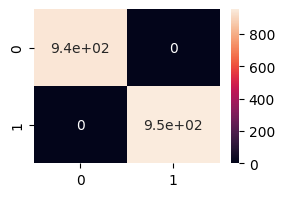

In [110]:
# Compute the confusion matrix to evaluate the performance of the classification model
cm = confusion_matrix(ytest, pred_y)

# Create a small figure for visualizing the confusion matrix
plt.figure(figsize=(3,2))

# Plot the confusion matrix as a heatmap with annotations
sns.heatmap(cm, annot=True)

# Display the confusion matrix heatmap
plt.show()

In [111]:
# Generate a detailed classification report including precision, recall, f1-score, and support for each class
cl = classification_report(ytest, pred_y)

# Print the classification report to evaluate model performance
print(cl)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       940
           1       1.00      1.00      1.00       954

    accuracy                           1.00      1894
   macro avg       1.00      1.00      1.00      1894
weighted avg       1.00      1.00      1.00      1894



In [112]:
# Calculate the overall accuracy of the model on the testing data
acc = accuracy_score(ytest, pred_y)

# Display the accuracy score
acc

1.0

In [113]:
# Calculate the F1 score of the model on the testing data to evaluate the balance between precision and recall
f1 = f1_score(ytest, pred_y)

# Display the F1 score
f1

1.0

In [114]:
# Calculate the ROC AUC score to evaluate the model's ability to distinguish between classes
rus = roc_auc_score(ytest, pred_y)

# Display the ROC AUC score
rus

1.0

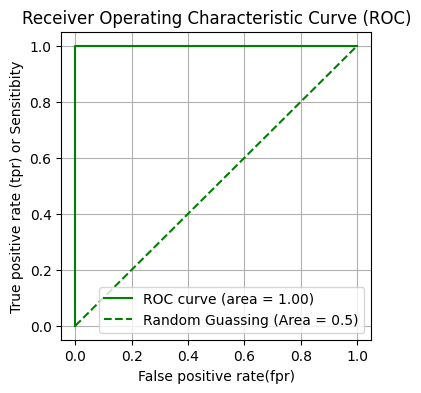

In [115]:
# Compute the False Positive Rate, True Positive Rate, and thresholds for the ROC curve
fpr, tpr, threshodls = roc_curve(ytest, pred_y)

# Calculate the Area Under the Curve (AUC) using FPR and TPR values
ruc_auc = auc(fpr, tpr)

# Create a figure for plotting the ROC curve
plt.figure(figsize=(4,4))

# Plot the ROC curve with AUC value shown in the legend
plt.plot(fpr, tpr, color='green', label=f'ROC curve (area = {ruc_auc:.2f})')

# Plot the diagonal line representing a random guessing classifier
plt.plot([0,1], [0,1], color='green', linestyle='--', label='Random Guassing (Area = 0.5)')

# Label the x-axis as False Positive Rate
plt.xlabel('False positive rate(fpr)')

# Label the y-axis as True Positive Rate (Sensitivity)
plt.ylabel('True positive rate (tpr) or Sensitibity')

# Set the title of the ROC curve plot
plt.title('Receiver Operating Characteristic Curve (ROC)')

# Display the legend at the lower right corner
plt.legend(loc='lower right')

# Add a grid to the plot for better readability
plt.grid(True)

# Display the ROC curve plot
plt.show()


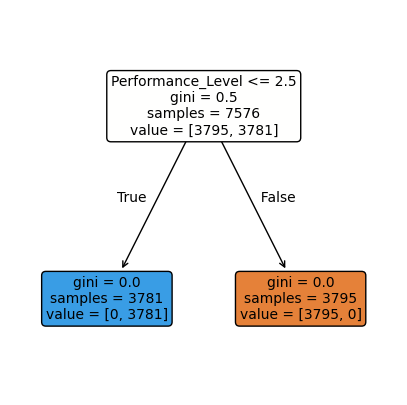

In [116]:
# Create a figure with specified size to visualize the Decision Tree clearly
plt.figure(figsize=(5,5))

# Plot the trained Decision Tree model with feature names and colored nodes
plot_tree(model, feature_names=x.columns, filled=True, rounded=True)

# Display the Decision Tree plot
plt.show()